In [1749]:
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1750]:
# combine all csv into one dataframe
path = os.getcwd() + '/pose_data'
files = os.listdir(path)

final_df = pd.DataFrame()
for file in files:
    df = pd.read_csv(path + '/' + file)
    df['label'] = file.split('.')[0]
    final_df = pd.concat([final_df, df], ignore_index=True)

In [1751]:

body_pose_landmarks = ["nose","left eye inner","left eye","left eye outer",
                        "right eye inner","right eye","right eye outer",
                        "left ear","right ear","mouth left","mouth right",
                        "left shoulder","right shoulder","left elbow",
                        "right elbow","left wrist","right wrist","left pinky",
                        "right pinky","left index","right index","left thumb",
                        "right thumb","left hip","right hip","left knee",
                        "right knee","left ankle","right ankle","left heel",
                        "right heel", "left foot index","right foot index"]

print(len(body_pose_landmarks))

col_name = []
for i in body_pose_landmarks:
    col_name += [i + ' X', i + ' Y', i + ' Z', i + ' V']

# rename columns
final_df.columns = col_name + ['label']

33


In [1752]:
final_df


,nose X,nose Y,nose Z,nose V,left eye inner X,left eye inner Y,left eye inner Z,left eye inner V,left eye X,left eye Y,...,right heel V,left foot index X,left foot index Y,left foot index Z,left foot index V,right foot index X,right foot index Y,right foot index Z,right foot index V,label
0,0.544536,0.261747,-0.191828,0.999297,0.549512,0.247008,-0.170033,0.999312,0.553208,0.246632,...,0.659899,0.545169,0.973575,-0.004307,0.979751,0.564355,0.708812,0.207060,0.684656,tree_data
1,0.501877,0.177308,-0.204558,0.999906,0.509858,0.161205,-0.176329,0.999883,0.513814,0.161368,...,0.922397,0.499676,0.661949,0.095757,0.836645,0.526667,0.917781,-0.025099,0.963109,tree_data
2,0.399920,0.222643,-0.261272,0.999634,0.410330,0.213970,-0.204106,0.999461,0.417404,0.214702,...,0.762350,0.422172,0.740239,-0.019755,0.736164,0.420179,0.858492,-0.292415,0.900488,tree_data
3,0.466361,0.359614,-0.366423,0.997576,0.474534,0.349394,-0.322601,0.997540,0.480053,0.349070,...,0.668833,0.439493,0.957202,-0.045964,0.935934,0.460402,0.743338,0.284203,0.600119,tree_data
4,0.461441,0.284309,-0.566891,0.999133,0.468821,0.271688,-0.526393,0.999079,0.475619,0.270789,...,0.905771,0.471193,0.683815,0.237712,0.650688,0.493756,0.907685,0.014034,0.931890,tree_data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,0.507627,0.336952,-0.007861,0.999071,0.498864,0.324175,0.011432,0.998848,0.496988,0.324000,...,0.953517,0.497711,0.906221,0.307360,0.537619,0.492885,0.918248,-0.125202,0.955975,chair_data
2003,0.356493,0.359166,-0.048896,0.999656,0.369852,0.348138,-0.087334,0.999656,0.373022,0.348731,...,0.521658,0.391402,0.948819,-0.201327,0.933657,0.386821,0.943065,0.200720,0.411756,chair_data
2004,0.470691,0.298334,-0.032904,0.997351,0.466058,0.283985,-0.019674,0.996768,0.464965,0.283579,...,0.881593,0.463634,0.921256,0.231399,0.399279,0.460696,0.924303,-0.017946,0.893422,chair_data
2005,0.660507,0.364982,-0.092975,0.995907,0.661033,0.344904,-0.074424,0.994927,0.659451,0.343339,...,0.949374,0.552334,0.893624,0.414546,0.493191,0.548051,0.895228,-0.004784,0.950031,chair_data


In [1753]:
# remove colums with V
final_df = final_df[final_df.columns[~final_df.columns.str.contains(' V')]]

# remove unecessary columns [0-10] face landmarks
# final_df = final_df.drop(final_df.iloc[:, 0:11], axis=1)

In [1754]:
def angle(self, point1, point2, point3):
    """ Calculate angle between two lines """
    if(point1==(0,0) or point2==(0,0) or point3==(0,0)):
        return 0
    numerator = point2[1] * (point1[0] - point3[0]) + point1[1] * \
                (point3[0] - point2[0]) + point3[1] * (point2[0] - point1[0])
    denominator = (point2[0] - point1[0]) * (point1[0] - point3[0]) + \
                (point2[1] - point1[1]) * (point1[1] - point3[1])
    try:
        ang = math.atan(numerator/denominator)
        ang = ang * 180 / math.pi
        if ang < 0:
            ang = 180 + ang
        return ang
    except:
        return 90.0

In [1755]:
'''
f1: angle between left shoulder, left elbow, left wrist
f2: angle between right shoulder, right elbow, right wrist
f3: angle between left shoulder, left hip, left knee
f4: angle between right shoulder, right hip, right knee
f5: angle between left hip, left knee, left ankle
f6: angle between right hip, right knee, right ankle
f7: angle between nose, left shoulder, left hip
f8: angle between nose, right shoulder, right hip
f9: angle between left shoulder, nose, right shoulder
f10: angle between left knee, left ankle, left foot index
f11: angle between right knee, right ankle, right foot index
f12: angle between left index, left wrist, left thumb
f13: angle between right index, right wrist, right thumb
f14: angle between left shoulder, left hip, left foot index
f15: angle between right shoulder, right hip, right foot index
'''

feature_df = pd.DataFrame()

feature_df['f1'] = final_df.apply(lambda x: angle(x, (x['left shoulder X'], x['left shoulder Y']), (x['left elbow X'], x['left elbow Y']), (x['left wrist X'], x['left wrist Y'])), axis=1)
feature_df['f2'] = final_df.apply(lambda x: angle(x, (x['right shoulder X'], x['right shoulder Y']), (x['right elbow X'], x['right elbow Y']), (x['right wrist X'], x['right wrist Y'])), axis=1)
feature_df['f3'] = final_df.apply(lambda x: angle(x, (x['left shoulder X'], x['left shoulder Y']), (x['left hip X'], x['left hip Y']), (x['left knee X'], x['left knee Y'])), axis=1)
feature_df['f4'] = final_df.apply(lambda x: angle(x, (x['right shoulder X'], x['right shoulder Y']), (x['right hip X'], x['right hip Y']), (x['right knee X'], x['right knee Y'])), axis=1)
feature_df['f5'] = final_df.apply(lambda x: angle(x, (x['left hip X'], x['left hip Y']), (x['left knee X'], x['left knee Y']), (x['left ankle X'], x['left ankle Y'])), axis=1)
feature_df['f6'] = final_df.apply(lambda x: angle(x, (x['right hip X'], x['right hip Y']), (x['right knee X'], x['right knee Y']), (x['right ankle X'], x['right ankle Y'])), axis=1)
feature_df['f7'] = final_df.apply(lambda x: angle(x, (x['nose X'], x['nose Y']), (x['left shoulder X'], x['left shoulder Y']), (x['left hip X'], x['left hip Y'])), axis=1)
feature_df['f8'] = final_df.apply(lambda x: angle(x, (x['nose X'], x['nose Y']), (x['right shoulder X'], x['right shoulder Y']), (x['right hip X'], x['right hip Y'])), axis=1)
feature_df['f9'] = final_df.apply(lambda x: angle(x, (x['left shoulder X'], x['left shoulder Y']), (x['nose X'], x['nose Y']), (x['right shoulder X'], x['right shoulder Y'])), axis=1)
feature_df['f10'] = final_df.apply(lambda x: angle(x, (x['left knee X'], x['left knee Y']), (x['left ankle X'], x['left ankle Y']), (x['left foot index X'], x['left foot index Y'])), axis=1)
feature_df['f11'] = final_df.apply(lambda x: angle(x, (x['right knee X'], x['right knee Y']), (x['right ankle X'], x['right ankle Y']), (x['right foot index X'], x['right foot index Y'])), axis=1)
feature_df['f12'] = final_df.apply(lambda x: angle(x, (x['left index X'], x['left index Y']), (x['left wrist X'], x['left wrist Y']), (x['left thumb X'], x['left thumb Y'])), axis=1)
feature_df['f13'] = final_df.apply(lambda x: angle(x, (x['right index X'], x['right index Y']), (x['right wrist X'], x['right wrist Y']), (x['right thumb X'], x['right thumb Y'])), axis=1)
feature_df['f14'] = final_df.apply(lambda x: angle(x, (x['left shoulder X'], x['left shoulder Y']), (x['left hip X'], x['left hip Y']), (x['left foot index X'], x['left foot index Y'])), axis=1)
feature_df['f15'] = final_df.apply(lambda x: angle(x, (x['right shoulder X'], x['right shoulder Y']), (x['right hip X'], x['right hip Y']), (x['right foot index X'], x['right foot index Y'])), axis=1)

In [1756]:
feature_df

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15
0,2.822345,175.272412,179.690134,165.284823,179.506072,53.229620,146.210079,20.329463,62.121581,0.770443,152.703020,164.731066,20.754775,179.457381,5.172514
1,125.826431,46.426423,20.183198,177.439102,109.270745,179.973128,157.657459,28.745638,63.577250,16.295255,1.223613,176.313466,3.838871,174.265755,176.653272
2,45.000032,139.103564,30.796548,179.797201,118.868703,177.957127,141.573735,47.433265,38.252119,9.309545,179.760930,146.620726,36.913773,177.986872,178.139845
3,5.462452,169.395703,1.920103,145.048075,178.424741,86.837099,129.913455,28.842077,39.672659,7.615355,166.909202,158.467938,14.971019,4.340393,11.342629
4,12.398418,164.671407,30.308088,179.274115,101.562927,0.465035,143.455123,36.245107,43.983102,11.668026,179.947663,161.091489,14.518851,171.838953,179.262585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,1.810277,4.631958,28.293380,30.986597,145.166659,143.359624,24.632521,24.702803,34.823638,23.382871,22.037782,176.493486,166.414975,25.109488,26.314740
2003,172.218266,174.362672,130.537579,133.069027,40.444834,40.382224,174.649830,175.920421,61.486092,143.305855,143.823776,31.067035,28.912550,132.607881,133.616993
2004,4.368393,3.154488,15.878122,16.645234,153.083218,150.869224,12.895210,17.965411,124.941340,13.373191,13.652365,174.162509,174.439390,14.359215,14.056477
2005,7.466092,10.027109,33.526908,34.626720,138.797971,136.073966,46.108109,43.469624,153.958528,21.308176,20.527915,2.262102,159.385742,28.555109,28.557469


In [1777]:
feature_class = feature_df
feature_class['label'] = final_df['label']
feature_class['label'] = feature_class['label'].replace('tree_data',0) 
feature_class['label'] = feature_class['label'].replace('cobra_data',1)
feature_class['label'] = feature_class['label'].replace('downdog_data',2)
feature_class['label'] = feature_class['label'].replace('goddess_data',3)
feature_class['label'] = feature_class['label'].replace('warrior_data',4)
feature_class['label'] = feature_class['label'].replace('chair_data',5)

feature_class.to_csv('/Users/priyanshdesai07/Plaksha/MLPR/Project/YogaPal/feature_class.csv',index=False)

### 0 - tree data
### 1 - cobra data
### 2 - downdog data
### 3 - goddess data
### 4 - warrior data
### 5 - chair data

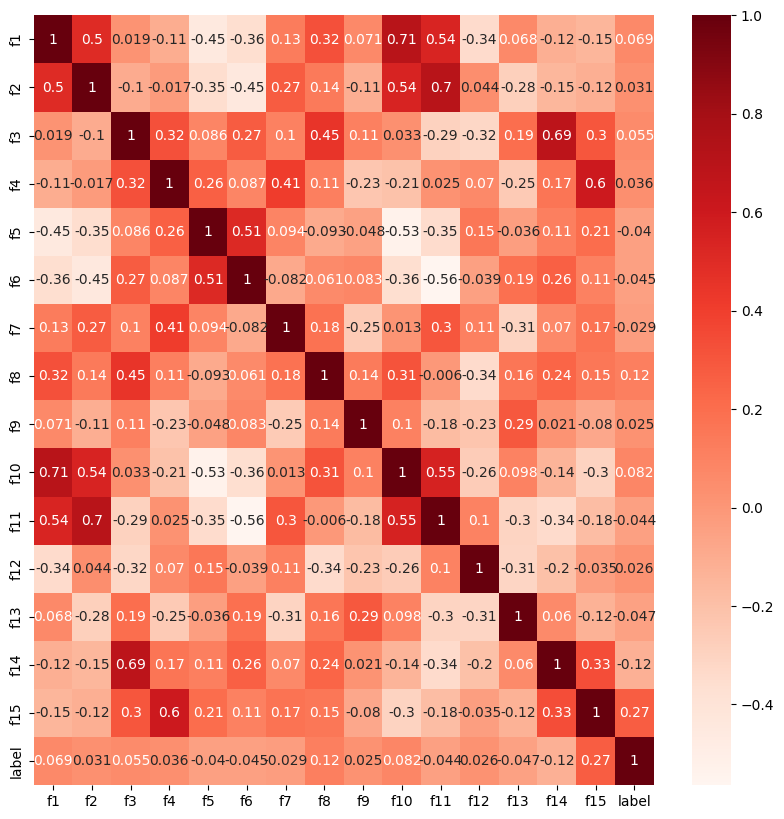

In [1758]:
# find correlation between features without label column
corr = feature_df.corr()

# plot correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()

In [1759]:
corr_pairs = corr.unstack()
sorted_pairs = corr_pairs.sort_values(kind="quicksort", ascending=False)

# getting strong correlations pairs (>0.5) and removing duplicates pairs
strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]
strong_pairs = strong_pairs[strong_pairs < 1]

print(strong_pairs[::2])

f1   f10    0.705925
f11  f2     0.703669
f3   f14    0.685552
f4   f15    0.600700
f10  f11    0.553626
     f2     0.542891
f1   f11    0.540450
f6   f5     0.512132
f1   f2     0.503439
f5   f10   -0.531069
f11  f6    -0.564252
dtype: float64


In [1760]:
# add label column to feature_df
feature_df['label'] = final_df['label'] 

# plot all features with label
sns.pairplot(feature_df, hue='label')
plt.show()